# Stock Market Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split 

#Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\WIPRO.csv")

In [3]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355940e+11,NaN,NaN,NaN
1,04-01-2000,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292190e+12,NaN,NaN,NaN
2,05-01-2000,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,06-01-2000,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157820e+13,NaN,NaN,NaN
4,07-01-2000,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [4]:
df.tail()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5199,23-11-2020,346.30,348.00,357.4,346.00,356.60,355.85,352.34,10333347,3.640890e+14,106325.0,3349439.0,0.3241
5200,24-11-2020,355.85,359.00,361.4,355.00,356.00,355.50,357.97,10092441,3.612740e+14,107092.0,2538120.0,0.2515
5201,25-11-2020,355.50,357.90,358.8,349.55,350.10,350.00,352.95,6812338,2.404380e+14,86679.0,2608016.0,0.3828
5202,26-11-2020,350.00,351.00,356.4,347.20,355.85,354.85,352.19,7366370,2.594390e+14,60305.0,2925743.0,0.3972
5203,27-11-2020,354.85,354.85,357.5,347.85,350.95,350.50,351.80,12402084,4.363060e+14,84716.0,7497319.0,0.6045


In [5]:
df.shape

(5204, 13)

In [6]:
df.isna().any()

Date                  False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
Close                 False
VWAP                  False
Volume                False
Turnover              False
Trades                 True
Deliverable Volume     True
%Deliverble            True
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5204 non-null   object 
 1   Prev Close          5204 non-null   float64
 2   Open                5204 non-null   float64
 3   High                5204 non-null   float64
 4   Low                 5204 non-null   float64
 5   Last                5204 non-null   float64
 6   Close               5204 non-null   float64
 7   VWAP                5204 non-null   float64
 8   Volume              5204 non-null   int64  
 9   Turnover            5204 non-null   float64
 10  Trades              2354 non-null   float64
 11  Deliverable Volume  4695 non-null   float64
 12  %Deliverble         4695 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 528.7+ KB


In [8]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5.204000e+03,5.204000e+03,2354.000000,4.695000e+03,4695.000000
mean,761.468111,763.421166,779.282292,744.522963,761.093246,761.050759,761.747350,1.968178e+06,9.106466e+13,43878.518267,9.295135e+05,0.462933
std,800.838634,809.785985,831.847197,774.733700,800.715581,800.486618,802.169512,3.994541e+06,1.247097e+14,36698.841500,1.190261e+06,0.184901
min,162.350000,163.100000,171.350000,159.400000,161.800000,162.350000,166.440000,1.003000e+03,4.355940e+11,692.000000,8.242000e+03,0.036400
25%,379.887500,380.000000,385.800000,373.287500,380.000000,379.850000,379.637500,6.882775e+05,4.291882e+13,24635.000000,2.955155e+05,0.343000
50%,509.175000,509.900000,515.875000,501.175000,509.625000,509.075000,508.725000,1.133838e+06,6.498235e+13,35709.500000,6.259610e+05,0.487400
75%,690.012500,690.925000,698.250000,680.512500,689.900000,689.512500,690.077500,1.934882e+06,1.044190e+14,52599.750000,1.147726e+06,0.599850
max,9587.450000,10350.000000,10350.000000,8928.350000,9640.000000,9587.450000,9607.140000,1.303677e+08,3.835410e+15,756365.000000,3.554140e+07,0.939400


In [9]:
df.columns

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [10]:
df["Volume"].value_counts()

454176     2
992969     2
623110     1
5420863    1
480600     1
          ..
1649284    1
473730     1
703478     1
1098652    1
3483647    1
Name: Volume, Length: 5202, dtype: int64

array([[<AxesSubplot:title={'center':'Prev Close'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Last'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'VWAP'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Turnover'}>],
       [<AxesSubplot:title={'center':'Trades'}>,
        <AxesSubplot:title={'center':'Deliverable Volume'}>,
        <AxesSubplot:title={'center':'%Deliverble'}>]], dtype=object)

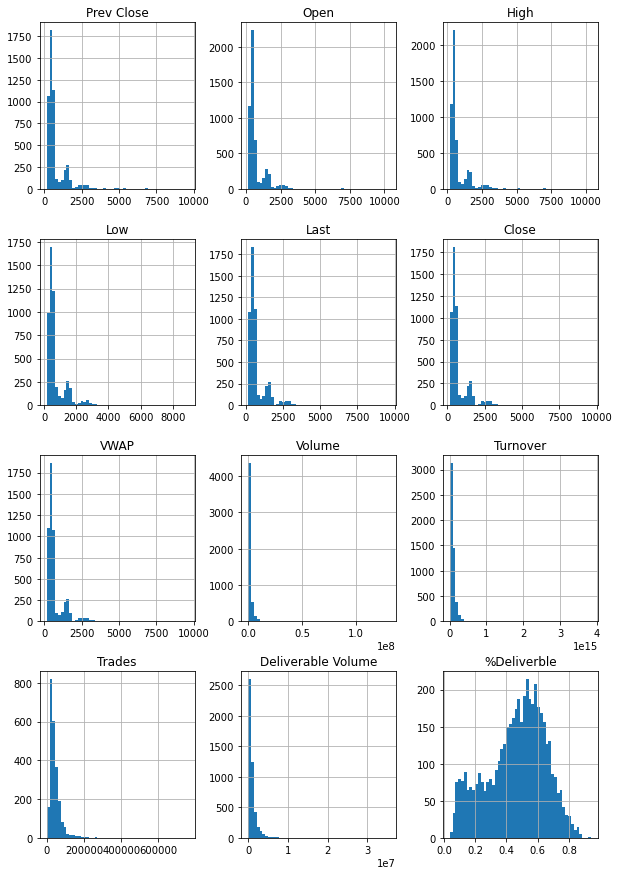

In [11]:
df.hist(bins=50,figsize=(10,15))

<AxesSubplot:>

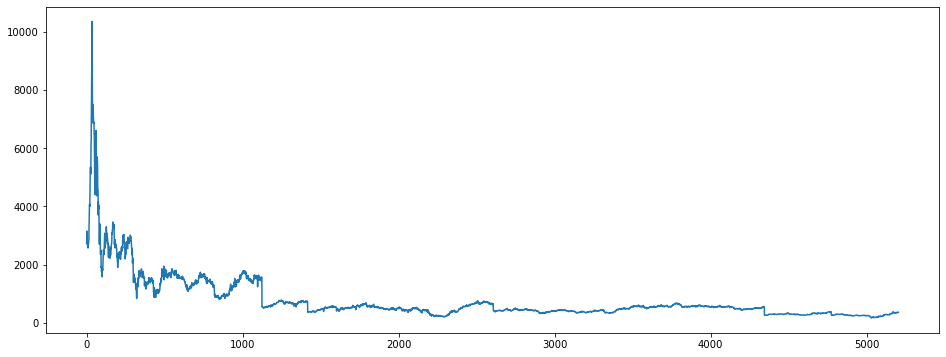

In [12]:
df['Open'].plot(figsize=(16,6))

In [13]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2787.164286,2847.957143,2925.771429,2709.442857,2775.614286,2781.885714,2810.685714,43971.142857,1.276864e+13,NaN,NaN,NaN
7,2781.885714,2828.814286,2909.171429,2675.300000,2753.585714,2758.842857,2784.911429,46605.142857,1.343455e+13,NaN,NaN,NaN
8,2758.842857,2776.221429,2863.150000,2606.421429,2688.264286,2692.857143,2727.408571,48703.428571,1.394218e+13,NaN,NaN,NaN
9,2692.857143,2725.914286,2779.214286,2562.135714,2613.285714,2622.535714,2642.632857,32719.857143,8.872000e+12,NaN,NaN,NaN


<AxesSubplot:>

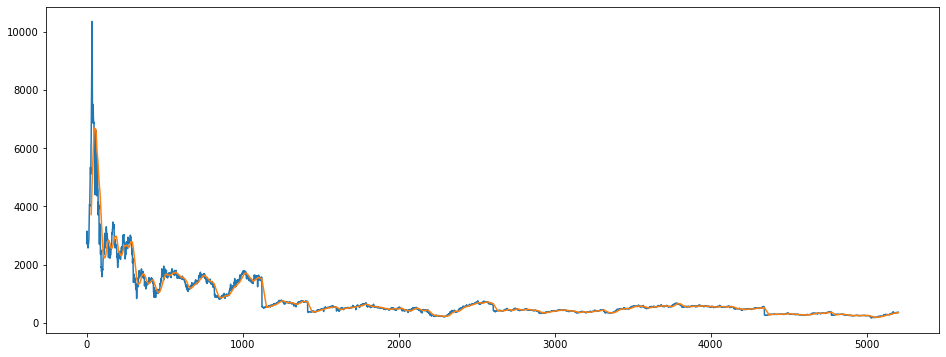

In [14]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

### Creating a Test Set

The purpose of creating a test set typically before analysis, is to avoid data snooping bias <br> We must maintain a strict separation of data used to develop hypotheses and train models from the data used to test them.

In [15]:
ds_train, ds_test = train_test_split(df, test_size=0.2, random_state=0)

In [16]:
ds_train.shape, ds_test.shape

((4163, 13), (1041, 13))

The corr() method on the dataset can be used to find correlations between every pair of attributes

In [17]:
ds_corr_matrix = ds_train.corr()

In [18]:
ds_corr_matrix

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.998528,0.998233,0.997986,0.997084,0.997169,0.997896,-0.178293,0.003323,-0.172114,-0.357713,-0.556191
Open,0.998528,1.000000,0.999216,0.998809,0.997925,0.998064,0.998860,-0.177650,0.003442,-0.171651,-0.357150,-0.555408
High,0.998233,0.999216,1.000000,0.998433,0.998723,0.998794,0.999238,-0.176329,0.006635,-0.163020,-0.355617,-0.558278
Low,0.997986,0.998809,0.998433,1.000000,0.999109,0.999227,0.999562,-0.179695,0.002427,-0.176556,-0.357390,-0.551688
Last,0.997084,0.997925,0.998723,0.999109,1.000000,0.999947,0.999587,-0.178367,0.005493,-0.169015,-0.356442,-0.555031
Close,0.997169,0.998064,0.998794,0.999227,0.999947,1.000000,0.999691,-0.178450,0.005427,-0.169297,-0.356530,-0.555113
VWAP,0.997896,0.998860,0.999238,0.999562,0.999587,0.999691,1.000000,-0.178421,0.005109,-0.169508,-0.356489,-0.555504
Volume,-0.178293,-0.177650,-0.176329,-0.179695,-0.178367,-0.178450,-0.178421,1.000000,0.929534,0.911441,0.768376,-0.068255
Turnover,0.003323,0.003442,0.006635,0.002427,0.005493,0.005427,0.005109,0.929534,1.000000,0.909644,0.706666,-0.107899
Trades,-0.172114,-0.171651,-0.163020,-0.176556,-0.169015,-0.169297,-0.169508,0.911441,0.909644,1.000000,0.717131,-0.356062


In [19]:
ds_corr_matrix["Close"].sort_values(ascending=False)

Close                 1.000000
Last                  0.999947
VWAP                  0.999691
Low                   0.999227
High                  0.998794
Open                  0.998064
Prev Close            0.997169
Turnover              0.005427
Trades               -0.169297
Volume               -0.178450
Deliverable Volume   -0.356530
%Deliverble          -0.555113
Name: Close, dtype: float64

In [20]:
# The drop() function that we use, will return a copy of the modified dataset without the dropped column. 
# Original dataset is not impacted at all.

X_train = df.drop("Deliverable Volume", axis=1) 

In [21]:
X_train.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,%Deliverble
0,03-01-2000,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355940e+11,NaN,NaN
1,04-01-2000,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292190e+12,NaN,NaN
2,05-01-2000,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN
3,06-01-2000,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157820e+13,NaN,NaN
4,07-01-2000,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN


In [22]:
y_train = df["Deliverable Volume"].copy()

In [23]:
y_train.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Deliverable Volume, dtype: float64

### Data Cleaning

In [24]:
# By default this function return a copy and does not modify the proginal dataset
X_train_new = X_train.dropna(subset=["%Deliverble"])

In [25]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4695 entries, 498 to 5203
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4695 non-null   object 
 1   Prev Close   4695 non-null   float64
 2   Open         4695 non-null   float64
 3   High         4695 non-null   float64
 4   Low          4695 non-null   float64
 5   Last         4695 non-null   float64
 6   Close        4695 non-null   float64
 7   VWAP         4695 non-null   float64
 8   Volume       4695 non-null   int64  
 9   Turnover     4695 non-null   float64
 10  Trades       2354 non-null   float64
 11  %Deliverble  4695 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 476.8+ KB


#### Option 2
Remove all columns with null values

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5204 non-null   object 
 1   Prev Close   5204 non-null   float64
 2   Open         5204 non-null   float64
 3   High         5204 non-null   float64
 4   Low          5204 non-null   float64
 5   Last         5204 non-null   float64
 6   Close        5204 non-null   float64
 7   VWAP         5204 non-null   float64
 8   Volume       5204 non-null   int64  
 9   Turnover     5204 non-null   float64
 10  Trades       2354 non-null   float64
 11  %Deliverble  4695 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 488.0+ KB


In [27]:
# using drop with axis = 1 signifies we intend to drop a column. axis = 0 implies row
X_train_new = X_train.drop("%Deliverble", axis=1)

In [28]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5204 non-null   object 
 1   Prev Close  5204 non-null   float64
 2   Open        5204 non-null   float64
 3   High        5204 non-null   float64
 4   Low         5204 non-null   float64
 5   Last        5204 non-null   float64
 6   Close       5204 non-null   float64
 7   VWAP        5204 non-null   float64
 8   Volume      5204 non-null   int64  
 9   Turnover    5204 non-null   float64
 10  Trades      2354 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 447.3+ KB


#### Option 3
Replace the null values with statistical mean/median/mode of the data in corresponding column
<br>
The word 'impute', in Finance domain means 'To assign value by inference'<br>

To impute a value one can <br>

1) Manually compute the mean/median/mode and use the same <br> OR <br> 
2) Use the ready-made classes provided by sklearn


In [29]:
imputer = SimpleImputer(strategy="median")

In [30]:
X_train_numeric = X_train.drop("Trades", axis=1)

In [31]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5204 non-null   object 
 1   Prev Close   5204 non-null   float64
 2   Open         5204 non-null   float64
 3   High         5204 non-null   float64
 4   Low          5204 non-null   float64
 5   Last         5204 non-null   float64
 6   Close        5204 non-null   float64
 7   VWAP         5204 non-null   float64
 8   Volume       5204 non-null   int64  
 9   Turnover     5204 non-null   float64
 10  %Deliverble  4695 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 447.3+ KB


# Linear regression

In [32]:
df = pd.read_csv("WIPRO.csv")
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355940e+11,NaN,NaN,NaN
1,04-01-2000,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292190e+12,NaN,NaN,NaN
2,05-01-2000,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,06-01-2000,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157820e+13,NaN,NaN,NaN
4,07-01-2000,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,23-11-2020,346.30,348.00,357.40,346.00,356.60,355.85,352.34,10333347,3.640890e+14,106325.0,3349439.0,0.3241
5200,24-11-2020,355.85,359.00,361.40,355.00,356.00,355.50,357.97,10092441,3.612740e+14,107092.0,2538120.0,0.2515
5201,25-11-2020,355.50,357.90,358.80,349.55,350.10,350.00,352.95,6812338,2.404380e+14,86679.0,2608016.0,0.3828
5202,26-11-2020,350.00,351.00,356.40,347.20,355.85,354.85,352.19,7366370,2.594390e+14,60305.0,2925743.0,0.3972


In [33]:
df=df.drop('Date', axis=1)
df=df.drop('Trades', axis=1)
df=df.drop('Deliverable Volume', axis=1)
df=df.drop('%Deliverble', axis=1)

In [34]:
#Preparing the Data
X = df.drop('Close', axis=1)
y = df['Close']

In [35]:
#divide our data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("score of Wipro dataset is:",reg.score(X_train, y_train))

score of Wipro dataset is: 0.9999273035950283
